In [79]:
from pandas import *
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARIMA
import numpy
import pandas as pd

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = Series.from_csv('2015_data.csv', header=None)
# seasonal difference
X = series.values
print(X)
days_in_year = 266
differenced = difference(X, days_in_year)
print((differenced))
# fit model
model = ARIMA(differenced, order=(3,2,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 1050
print(start_index)
print(end_index)

# start_index =  '25-09-2018'
# end_index =  '25-10-2018'
# print(start_index)
forecast = model_fit.predict(start=start_index, end=end_index)
# print(forecast)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

[1506 1527 1516 1543 1502 1544 1561 1496 1544 1460  780  810  809  785
  793  775  756  767  784  778  789  772  810  810  796  777  771  776
  795  771  772  775  790  773  787  769  783  797  755  805  772  799
  769  787  766  826  787  772  761  754  815  802  789  793  769  782
  781  813  796  791  765  784  760  815  784  763  778  736  768  792
  779  802  760 2280 2198 2254 2277 2236 2302 2219 2215 2258 2243 2234
 2250 2237 2296 2189 2228 2250  763  800  763  789  802  765  763  772
  782  787  774  778  804  803  757  770  775  784  759  822  773  795
  750  807  747  759  738  796  780  766  760  755  780  752  773  817
  781  765  765  785  817  798  786  771  758  777  762  751  798  774
  800  775  769  784  794  748  825  765  734  778  772  765  803  801
  780  784  806  745  806  765  813  747  762  805  745  813  741  771
  783  743  778  768  790  806  814  786  811  785  782  805  742  771
  756  743  821  795  748  794  787  770  819  794  765  802  779  775
  784 

1416


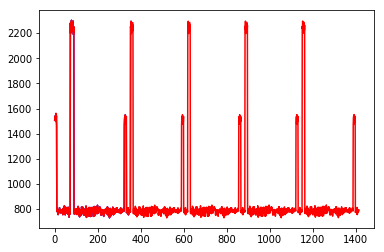

In [82]:
print(len(history))

plt.plot(X, color='blue')
plt.plot(history, color='red')
